# **Digital Image Processing (EE-433) - Lab #11**

***Color Image Processing***

Name: Muhammad Saad Tariq

Cms: 224921

Class: BSCS-7A

Original Image: 


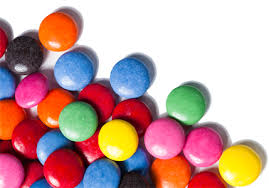

interactive(children=(IntSlider(value=40, description='lowH', max=255), IntSlider(value=75, description='highH…

<function __main__.func>

In [31]:
############# Task 1 #############
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, Output
from matplotlib import pyplot as plt
import math


image = cv2.imread('smarties.jpg')
print('Original Image: ')
cv2_imshow(image)

#converting rgb into hsv
img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def func(lH,hH,lS,hS,lV,hV):
  upper_range = np.array([hH,hS,hV])
  lower_range = np.array([lH,lS,lV])
  msk = cv2.inRange(img, lower_range, upper_range)
  res = cv2.bitwise_and(image, image, mask=msk)
  cv2_imshow(res)
  return lH,hH,lS,hS,lV,hV

interact(func, lH = IntSlider(value=40, max=255, min=0, step = 1, description='lowH'), hH = IntSlider(value=75, max=255, min=0, step = 1, description='highH'), 
         lS = IntSlider(value=40, max=255, min=0, step = 1, description='lowS'), hS = IntSlider(value=255, max=255, min=0, step = 1, description='highS'), 
         lV = IntSlider(value=40, max=255, min=0, step = 1, description='lowV'), hV = IntSlider(value=255, max=255, min=0, step = 1, description='highV'))



Original Image: 


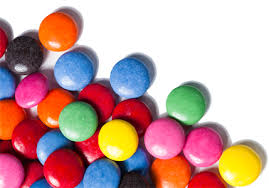

interactive(children=(IntSlider(value=90, description='lowH', max=255), IntSlider(value=108, description='high…

<function __main__.func>

In [32]:
############# Task 2 #############

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, Output
from matplotlib import pyplot as plt
import math


image = cv2.imread('smarties.jpg')
print('Original Image: ')
cv2_imshow(image)

#converting rgb into hsv
img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#defne kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

def func(lH,hH,lS,hS,lV,hV):
  upper_range = np.array([hH,hS,hV])
  lower_range = np.array([lH,lS,lV])
  msk = cv2.inRange(img, lower_range, upper_range)
  res = cv2.bitwise_and(image, image, mask=msk)
  cv2_imshow(res)
  #diating the image to reduce noise
  mph = cv2.morphologyEx(msk, cv2.MORPH_CLOSE, kernel, iterations = 6)
  print('\nDilated Mask: ')
  cv2_imshow(mph)
  #finding contours in the dilated mask
  contours, hierarchy = cv2.findContours(mph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  #get coordinates for rectangle and draw bounding box
  for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  print('\nBounding box around all blue smarties: ')
  cv2_imshow(image)
  return lH,hH,lS,hS,lV,hV

interact(func, lH = IntSlider(value=90, max=255, min=0, step = 1, description='lowH'), hH = IntSlider(value=108, max=255, min=0, step = 1, description='highH'), 
         lS = IntSlider(value=80, max=255, min=0, step = 1, description='lowS'), hS = IntSlider(value=255, max=255, min=0, step = 1, description='highS'), 
         lV = IntSlider(value=120, max=255, min=0, step = 1, description='lowV'), hV = IntSlider(value=255, max=255, min=0, step = 1, description='highV'))

